# DATA Analysis - Binder version

Explain


#### Further implementation:

- Data to be put in ordo (or Zenodo)

#### Libraries

- **gdown**: Download a large file from Google Drive
- **zenodo_dl**: downloading large Zenodo records which contain many files

In [53]:
import numpy 
import math
import matplotlib
import matplotlib.pyplot as plt
import ipympl 
from matplotlib import cm
import matplotlib.colors as mcolors
import pandas as pd
from glob import glob
from functools import reduce
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, HBox
import re
from itertools import cycle
import zipfile 
#import zenodo_dl as zdl
#import wx
#import gdown 

In [54]:
%matplotlib widget

In [55]:
#spl = 'ASW'

# Data import

5 csv that include all the reduced data so far (31-03-2022) are imported as df :

- XP_list_test (XP_Ramp_df)
- Data_Annex_full (Data_Annex_full_df)
- DR1_full (DR1_full_df)
- DR2_full (DR2_full_df)
- DR3_full (DR3_full_df)

### Download  

DR2 and DR1 are big files, hence they are stored on google drive and needs to be uploaded within the notebook.

- Use Zenodo link to download the data !!!

In [56]:
# DR1

## Data

DR1_full_df = pd.read_csv("..\..\Data\DATA_Full\DR1_Full.csv")
del DR1_full_df['Unnamed: 0']

## Data Annex

DR1_Data_annex_full_df = pd.read_csv("..\..\Data\DATA_Full\DR1_Data_Annex_Full.csv")  
del DR1_Data_annex_full_df['Unnamed: 0']


# DR2

## Data
                       
DR2_full_df = pd.read_csv("..\..\Data\DATA_Full\DR2_Full.csv")  
del DR2_full_df['Unnamed: 0']

## Data Annex

DR2_Data_annex_full_df = pd.read_csv("..\..\Data\DATA_Full\DR2_Data_Annex.csv")  
del DR2_Data_annex_full_df['Unnamed: 0']

### Cleaning (need to supress wavenumber column)

DR2_Data_annex_full_df = DR2_Data_annex_full_df.set_index('Name')
                

# Sample_T_Ref

XP_Ramp_df = pd.read_csv("..\..\Data\DATA_Full\Sample_T-Ramp_Final.csv") 
XP_Ramp_df_I = XP_Ramp_df.set_index('Date')

## Sanity check

**Check that DR2 and DR1 have the same shape (row / columns)** 

In [57]:
#DR2_Data_annex_full_df
XP_Ramp_df_I

,Sample,20,25,30,35,40,50,55,60,65,...,137,138,140,142,145,150,155,160,180,200
Date,,,,,,,,,,,,,,,,,,,,,
2020_09_15,ASW,[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,[3],NaN,NaN,NaN,NaN,[4],NaN,NaN
2020_09_16,ASW,"[1, 2]",NaN,NaN,NaN,"[3, 4, 5]",NaN,NaN,"[6, 7, 8]",NaN,...,NaN,NaN,"[21, 22, 23]",NaN,NaN,NaN,NaN,"[24, 25, 26]","[27, 28, 29]","[30, 31]"
2020_09_17,ASW,"[1, 2]",NaN,NaN,NaN,"[3, 4, 5]",NaN,NaN,"[6, 7, 8]",NaN,...,NaN,NaN,"[21, 22, 23]",NaN,NaN,NaN,NaN,"[24, 25, 26]","[27, 28]",NaN
2020_09_21,ASW,"[1, 2]",NaN,NaN,NaN,"[3, 4, 5]",NaN,NaN,"[6, 7, 8]",NaN,...,NaN,NaN,"[21, 22, 23]",NaN,NaN,NaN,NaN,"[24, 25, 26]","[27, 28]",NaN
2020_09_28,ASW,"[1, 2]",NaN,"[3, 4, 5, 6]",NaN,"[7, 8, 9, 10]","[11, 12, 13, 14]",NaN,"[15, 16, 17, 18]",NaN,...,NaN,NaN,"[59, 60, 61, 62]",NaN,"[63, 64, 65, 66]","[67, 68, 69, 70, 71, 72, 73, 74]","[75, 76, 77, 78]","[79, 80]",NaN,NaN
2020_10_22,ASW,"[1, 2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"[45, 46, 47]","[48, 49, 50]","[51, 52, 53]","[54, 55, 56]","[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]",NaN,[68],NaN,NaN
2020_11_16,ASW,"[1, 2]",NaN,NaN,NaN,NaN,NaN,NaN,"[3, 4, 5]",NaN,...,"[47, 48, 49, 50]","[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 6...","[65, 66, 67]",NaN,"[68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7...",NaN,NaN,NaN,NaN,NaN
2020_11_19,ASW,"[1, 2]",NaN,NaN,NaN,NaN,NaN,NaN,"[3, 4, 5, 6, 7, 8, 9, 10]",NaN,...,NaN,NaN,"[90, 91, 92]",NaN,"[93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 10...",NaN,NaN,NaN,NaN,NaN
2021_05_24,ASW,"[1, 2, 3]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"[393, 394, 395, 396, 397, 398, 399, 400, 401, ...",NaN,"[419, 420, 421, 422, 423, 424, 425, 426, 427, ...",NaN,NaN,NaN,NaN,NaN


# Scan selection

## Parameter list

In [58]:
Temp = XP_Ramp_df_I.columns[1:].values.tolist()
Date = XP_Ramp_df_I.index.values.tolist()
Sample = XP_Ramp_df_I['Sample'].values.tolist()
Reduc = ['DR2','DR3']
Scans = ['Single','Multi']
Param = list(DR2_Data_annex_full_df.columns.values)


ASW_spl_list = ["2020_09_15","2020_09_16","2020_09_17","2020_09_21","2020_09_24","2020_09_28", "2020_10_14","2020_10_15","2020_10_22","2020_10_30","2020_11_16","2020_11_19","2020_11_23","2020_11_26","2021_01_21","2021_01_25","2021_02_09","2021_04_26","2021_05_08","2021_05_13","2021_05_24","2021_07_13"]

C2H6_spl_list = ["2020_12_03","2021_09_15","2021_09_18","2021_09_19"]

C2H6_ASW_spl_list = ["2021_01_29","2021_01_24","2021_03_08","2021_03_24","2021_07_16","2021_08_16","2021_09_20","2021_09_23","2021_09_27","2021_10_04","2021_10_07","2021_10_11","2021_10_18","2021_10_22","2021_10_24","2021_10_28"]


## Widget selection

Some stuffs

**Insert some links towards ressources**:

In [59]:
#Create Dropdown Box Widget

#wR = widgets.SelectMultiple(
#    options= Reduc,
#    description='Reduction',
#    disabled=False,
#)

wT = widgets.SelectMultiple(
    options= Temp,
    description='Temperature:',
    layout=Layout(width='20%', height='200px',),
    disabled=False,
)

wD = widgets.SelectMultiple(
    options= Date,
    description='Date',
    layout=Layout(width='20%', height='200px'),
    disabled=False,
)

wS = widgets.SelectMultiple(
    options= Scans,
    description='Scans',
    disabled=False,
)

wI = widgets.Checkbox(
    value=False,
    description='Iso',
    disabled=False,
    indent=False
)


#widgets.HBox([wD,wT])

h1 = widgets.HBox(children=[wD,wT,wS,wI])


#display(wT,wD)
display(h1)

### Confirm 

Click on the cell below to confirm the selected scans

In [60]:
wT_L = list(wT.value)
wD_L = list(wD.value)
wS_L = list(wS.value)
wI_L = bool(wI.value)

## Sample name construction

Can I create an intermediate step to select only one number from the many per temperature when I don`t want to plot the isotherms
- create input button (boolean that allow to choose between 1 scan or isotherm)


<div class="alert alert-block alert-warning">
<b>To add: </b> Insert an if condition that modify the sample name (ASW, C2H6, ASW_C2H6)
</div>

In [61]:
#date = ['2020_09_16','2020_09_17']
#temp = ['60K','80K']
#spl = 'ASW'

z = []
value_1 = []
value_2 = []

for x in wD_L:
    
    if x in ASW_spl_list:
        
        spl = "ASW"
        
    if x in C2H6_spl_list:
        
        spl = "C2H6"
        
    if x in C2H6_ASW_spl_list:
        
        spl = "C2H6_ASW"
    
    for y in wT_L:

        value = str(XP_Ramp_df_I.loc[XP_Ramp_df_I.index == x, y].values[0])
        print(value)
        print(type(value))
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
        print(value_1)
        
        #Isotherm (all values but first one - Warm-up scan)
        #value_2 = value_1[1:]   #here we selct all but first value (warm-up)
        
        #Multiple scans (T range) - (Only the last value)
        #value_2 = value_1[-1:]  #here we selct only the last value of the list
        
        print(value_1)
        for items in value_1: 

            to_plot = str('{}_{}_{}'.format(spl, x, items))
            z.append({
                
               'Name' : str(to_plot),
               'Temp' : y,
               'Date' : x, 
                
          
         
         })

dat= pd.DataFrame(z)
data_df = dat.set_index('Name')
            

[1, 2]
<class 'str'>
['1', '2']
['1', '2']
[7, 8, 9, 10]
<class 'str'>
['7', '8', '9', '10']
['7', '8', '9', '10']


In [62]:
dat

,Name,Temp,Date
0,ASW_2020_09_28_1,20,2020_09_28
1,ASW_2020_09_28_2,20,2020_09_28
2,ASW_2020_09_28_7,40,2020_09_28
3,ASW_2020_09_28_8,40,2020_09_28
4,ASW_2020_09_28_9,40,2020_09_28
5,ASW_2020_09_28_10,40,2020_09_28


## Plot pre-formating

### Temperature

In [63]:
def Temp_color(row):
    if row['Temp'] == '20':
        return int(1)
    elif row['Temp'] == '30':
        return int(2) 
    elif row['Temp'] == '40':
        return int(3)
    elif row['Temp'] == '50':
        return int(4)
    elif row['Temp'] == '60':
        return int(5)
    elif row['Temp'] == '70':
        return int(6)
    elif row['Temp'] == '80':
        return int(7)
    elif row['Temp'] == '90':
        return int(8)
    elif row['Temp'] == '100':
        return int(9)
    elif row['Temp'] == '110':
        return int(10)
    elif row['Temp'] == '120':
        return int(11)
    elif row['Temp'] == '125':
        return int(12)
    elif row['Temp'] == '130':
        return int(13)
    elif row['Temp'] == '132':
        return int(14)
    elif row['Temp'] == '134':
        return int(15)
    elif row['Temp'] == '135':
        return int(16)
    elif row['Temp'] == '136':
        return int(17)
    elif row['Temp'] == '137':
        return int(18)
    elif row['Temp'] == '138':
        return int(19)
    elif row['Temp'] == '140':
        return int(20)
    elif row['Temp'] == '145':
        return int(21)
    elif row['Temp'] == '150':
        return int(21)
    elif row['Temp'] == '155':
        return int(22)
    elif row['Temp'] == '160':
        return int(23)
    elif row['Temp'] == '180':
        return int(24)
    elif row['Temp'] == '200':
        return int(25)

In [64]:
data_df['Colour'] = data_df.apply (lambda row: Temp_color(row), axis=1)

### Linestyle (date)

In [65]:
linestyle = ['-',':','--','-.']

In [66]:
LD = dict(zip(wD_L, linestyle))

data_df['linestyle'] = data_df['Date'].map(LD)

In [67]:
LD

{'2020_09_28': '-'}

### Sanity Check

In [68]:
data_df

,Temp,Date,Colour,linestyle
Name,,,,
ASW_2020_09_28_1,20,2020_09_28,1,-
ASW_2020_09_28_2,20,2020_09_28,1,-
ASW_2020_09_28_7,40,2020_09_28,3,-
ASW_2020_09_28_8,40,2020_09_28,3,-
ASW_2020_09_28_9,40,2020_09_28,3,-
ASW_2020_09_28_10,40,2020_09_28,3,-


# Plotting

## Scans

### DR2

6


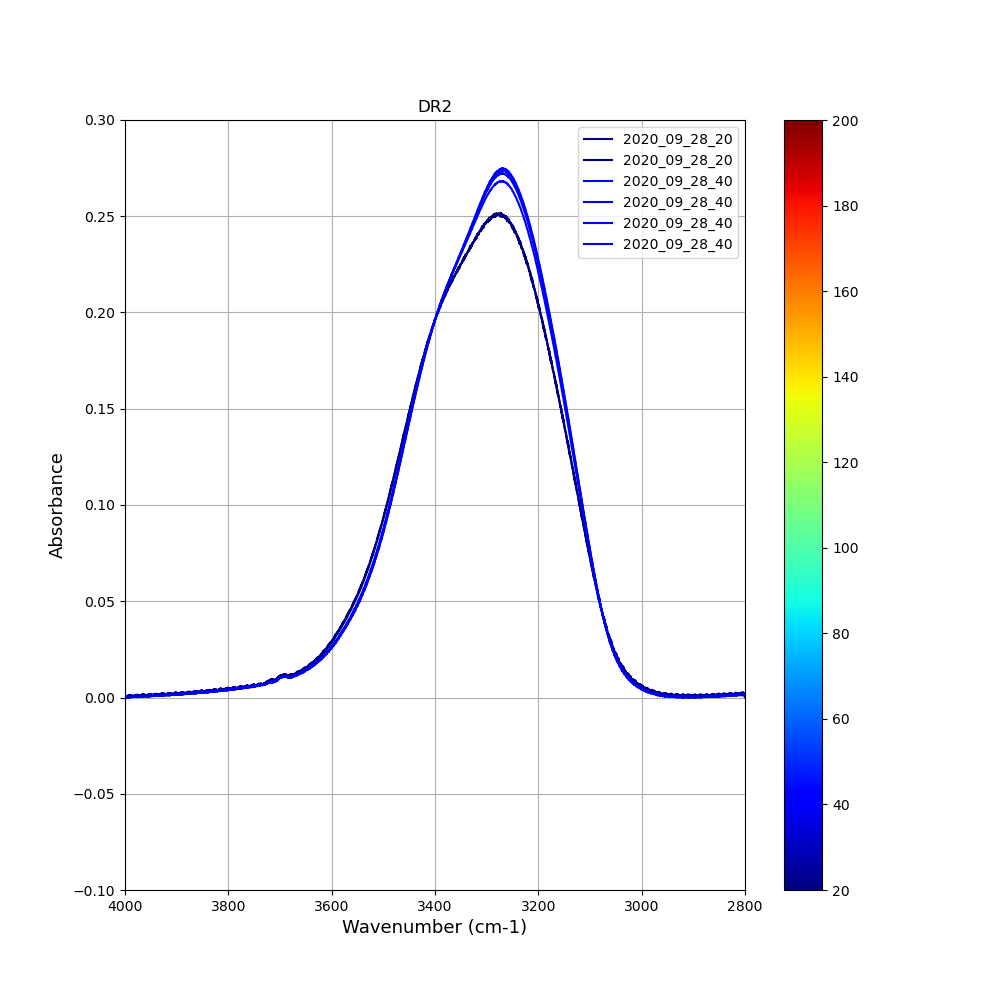

In [69]:
nscan = len(list(data_df['Date'].values.tolist()))

print(nscan)

fig, ax= plt.subplots(figsize=(10,10))

normalize = mcolors.Normalize(vmin=20, vmax=200)
colormap = cm.jet

for i in dat['Name']:
    

    x = DR2_full_df.Wavenumber
    y = DR2_full_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(data_df.loc[i]['Date']), str(data_df.loc[i]['Temp'])), color=colormap(normalize(int(data_df.loc[i]['Temp']))), linestyle=(data_df.loc[i]['linestyle'])) 


plt.title('DR2')
plt.axis([4000,2800,-0.1,0.30])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()

### DR1

Why:
- Compare the DR2 and DR1 to see if the difference observed arise from the reduction process.

6


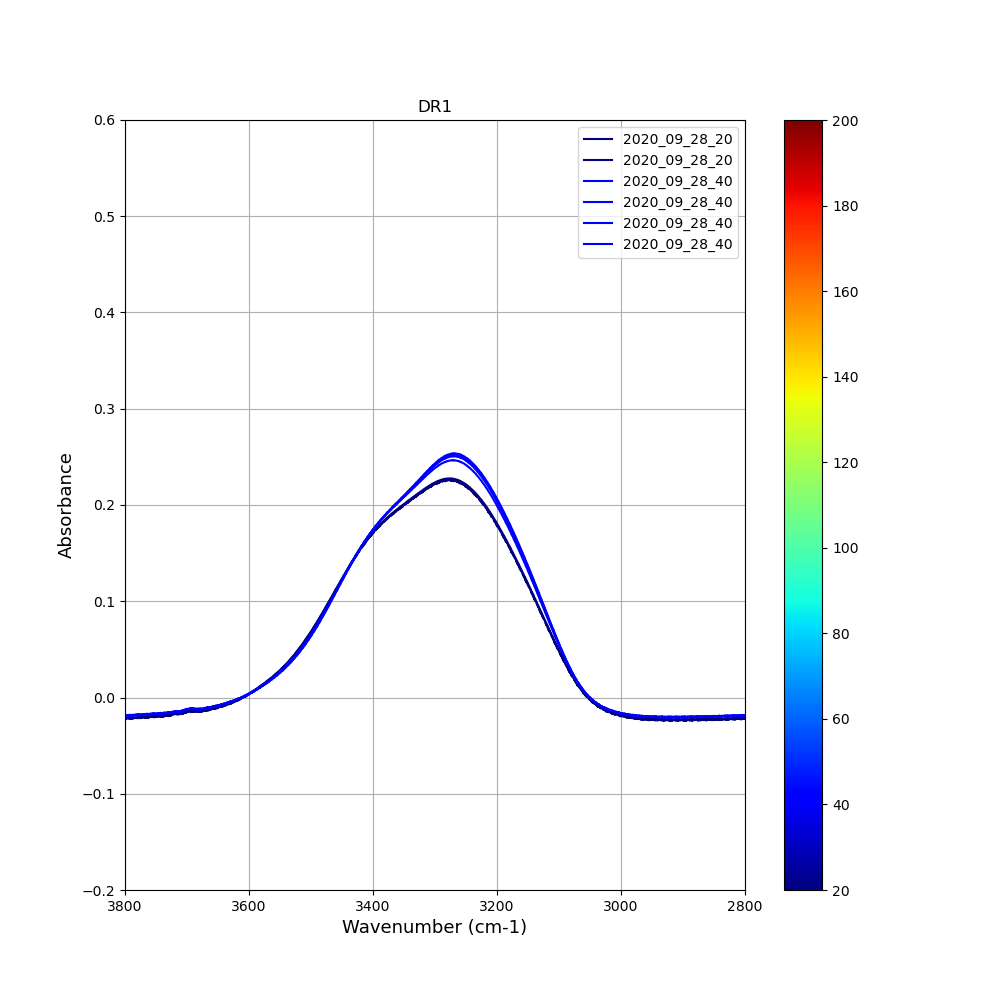

In [70]:
nscan = len(list(data_df['Date'].values.tolist()))

print(nscan)

fig, ax= plt.subplots(figsize=(10,10))

normalize = mcolors.Normalize(vmin=20, vmax=200)
colormap = cm.jet

for i in dat['Name']:
    

    x = DR1_full_df.Wavenumber
    y = DR1_full_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(data_df.loc[i]['Date']), str(data_df.loc[i]['Temp'])), color=colormap(normalize(int(data_df.loc[i]['Temp']))), linestyle=(data_df.loc[i]['linestyle'])) 


plt.title('DR1')
plt.axis([3800,2800,-0.2,0.6])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()

### DR3

Not available for now

In [ ]:
nscan = len(list(data_df['Date'].values.tolist()))

print(nscan)

fig, ax= plt.subplots(figsize=(12,10))

normalize = mcolors.Normalize(vmin=20, vmax=200)
colormap = cm.jet

for i in dat['Name']:
    
#`DR3

    x = DR3_full_df.Wavenumber
    y = DR3_full_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(data_df.loc[i]['Date']), str(data_df.loc[i]['Temp'])), color=colormap(normalize(int(data_df.loc[i]['Temp']))), linestyle=(data_df.loc[i]['linestyle'])) 


plt.title('DR3 ')
plt.axis([3800,2800,0,0.45])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()

## Data Annex

## Plotting

Use interact to play with the data I plot

In [71]:
wP = widgets.SelectMultiple(
    options= Param,
    description='Parameters',
    disabled=False,
)

display(wP)


SelectMultiple(description='Parameters', options=('min1', 'index1', 'min2', 'index2', 'min3', 'index3', 'min4'…

In [72]:
wP_L = list(wP.value)

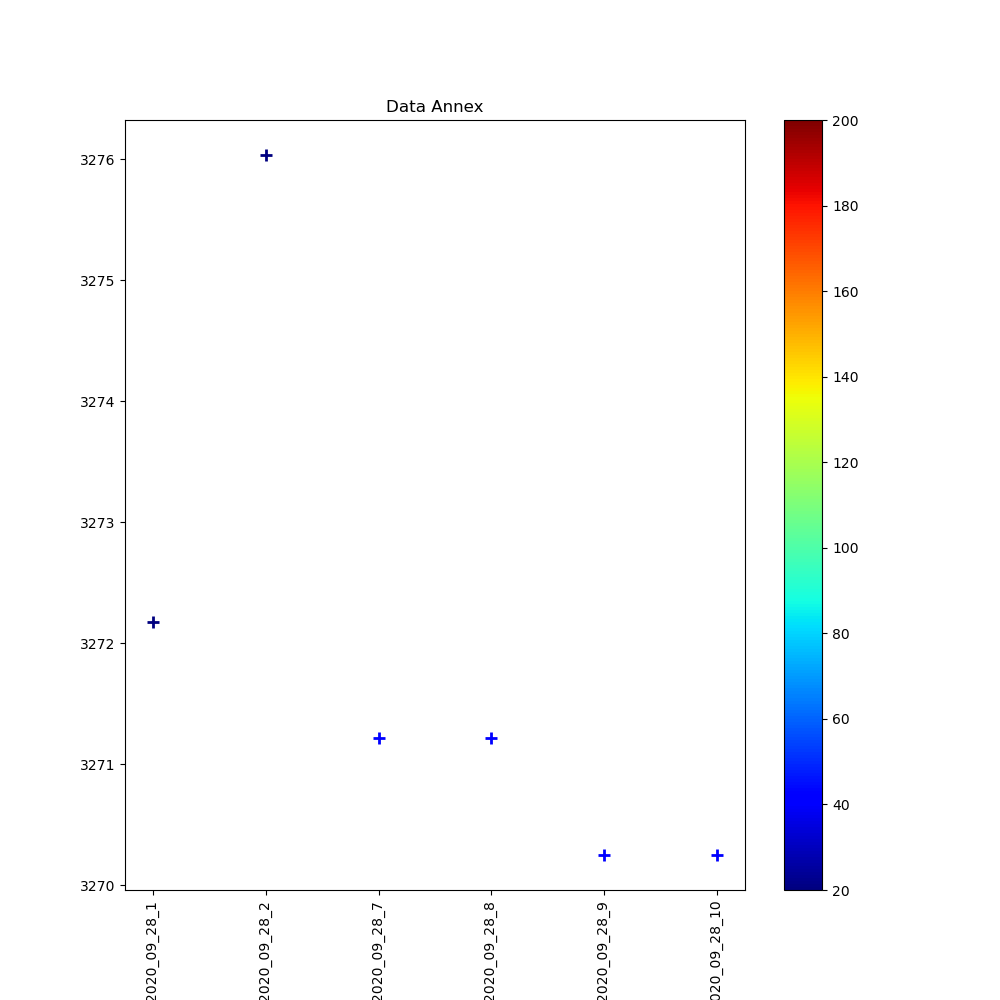

In [73]:
# Widget selection



#interact(wP = widgets.SelectMultiple(
#    options= Param,
#    description='Parameters',
#    disabled=False,
#));




# Figure

fig, ax= plt.subplots(figsize=(10,10))

normalize = mcolors.Normalize(vmin=20, vmax=200)
colormap = cm.jet

for i in dat['Name']:
    for j in wP_L:

    #print(i)
    #print(j)
        
        x = DR2_Data_annex_full_df[('{}'.format(j))].loc[('{}'.format(i))]
        #y = Data_Annex_full_df['{}'.format(j)]
        #y = Data_Annex_full_df['{}'.format(j)].loc[Data_Annex_full_df.index == ('{}'.format(i))]
        #y = Data_Annex_full_df.loc[(Data_Annex_full_df['{}'.format(j)])] & [(Data_Annex_full_df['column_name'] == x)]
        #print(x,y)
        #print(i)    
        #print(x)
    
        

        plt.plot(i,x, '+', mew=2, ms=8, color=colormap(normalize(int(data_df.loc[i]['Temp']))) )

plt.title('Data Annex')
#plt.axis([3800,2800,0,0.45])
# Set number of ticks for x-axis

# Set ticks labels for x-axis

#plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)

#plt.ylabel('Absorbance').set_fontsize(13)
plt.xticks(rotation=90)
#plt.tight_layout()
ax = fig.gca()
#plt.grid()
#plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()

## More

 - fit linear model to desorption great